In [83]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from yellowbrick.classifier import ClassificationReport

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
from sklearn.model_selection import learning_curve
from yellowbrick.model_selection import LearningCurve
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import mlrose_hiive 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import time


In [84]:
#Import league_games.csv into a dataframe
league_games = pd.read_csv(r'C:\\Users\\Jampy\\Machine Learning\\league_games.csv',delimiter=';')

# isolate columns that are needed gamelength, t1_ban1


league_games_y = league_games[['t1_result']]
league_games_y.head(40)

#league_games print column names
#print every column name without the ...
#make a list of ['t1p1_kills',...'t2p5_kills']
column_list = ['t1_firstblood', 't1_firstdragon', 't1_dragons','t2_firstblood', 't2_firstdragon', 't2_dragons']
for i in range(1,6):
    for j in range(1,3):
        column_list.append('t'+str(j)+'p'+str(i)+'_kills')
        column_list.append('t'+str(j)+'p'+str(i)+'_deaths')
        column_list.append('t'+str(j)+'p'+str(i)+'_assists')
league_games_x = league_games[column_list]

#replace Nan with row mean
league_games_x = league_games_x.fillna(league_games_x.mean())

#ravel the y
league_games_y = league_games_y.values.ravel()



#split the data into training and testing
league_games_X_train, league_games_X_test, league_games_y_train, league_games_y_test = train_test_split(league_games_x, league_games_y, test_size=0.2, random_state=42, shuffle=True)

league_games_X_train = MinMaxScaler().fit_transform(league_games_X_train)

league_games_X_train = np.array(league_games_X_train)

league_games_y = one_hot.fit_transform(league_games_y.reshape(-1, 1)).todense()

league_games_y

matrix([[0., 1.],
        [1., 0.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [53]:
#League of Legends Neural Network
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}
mlp = MLPClassifier(random_state=42)
mlp.feature_names = league_games_x.columns 
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(league_games_X_train, league_games_y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [110]:
#Hill Climbing
HC_NN = mlrose_hiive.NeuralNetwork(
                                    hidden_nodes =best_params['hidden_layer_sizes'] , 
                                    activation =best_params['activation'],
                                    algorithm ='random_hill_climb', 
                                    max_iters = 300,
                                    bias = True, 
                                    is_classifier = True, 
                                    learning_rate = best_params['alpha'],
                                    early_stopping = True, 
                                    clip_max = 5,
                                    curve=True,
                                    max_attempts = 100,
                                    random_state = 42)
start = time.time()
HC_NN.fit(league_games_X_train, league_games_y_train)
end = time.time()
HC_time = end - start

#Simulated Annealing
SA_NN = mlrose_hiive.NeuralNetwork(
                                    hidden_nodes =best_params['hidden_layer_sizes'] , 
                                    activation =best_params['activation'],
                                    algorithm ='simulated_annealing', 
                                    max_iters = 300,
                                    bias = True, 
                                    is_classifier = True, 
                                    learning_rate = best_params['alpha'],
                                    early_stopping = True, 
                                    clip_max = 5,
                                    curve=True,
                                    max_attempts = 100,
                                    random_state = 42)
start = time.time()
SA_NN.fit(league_games_X_train, league_games_y_train)
end = time.time()
SA_time = end - start

#Genetic Algorithm
GA_NN = mlrose_hiive.NeuralNetwork(
                                    hidden_nodes =best_params['hidden_layer_sizes'] , 
                                    activation =best_params['activation'],
                                    algorithm ='genetic_alg', 
                                    max_iters = 300,
                                    bias = True, 
                                    is_classifier = True, 
                                    learning_rate = best_params['alpha'],
                                    early_stopping = True, 
                                    clip_max = 5,
                                    curve=True,
                                    max_attempts = 100,
                                    random_state = 42)
start = time.time()
GA_NN.fit(league_games_X_train, league_games_y_train)
end = time.time()
GA_time = end - start   

times = [('RHC', round(HC_time, 3)), 
        ('SA', round(SA_time, 3)), 
        ('GA', round(GA_time, 3))] 

df = pd.DataFrame(times, columns =['Algorithm', 'Time']) 


df

,Algorithm,Time
0,RHC,3.818
1,SA,4.729
2,GA,499.896


In [114]:
#Backpropagation
GD_NN = mlrose_hiive.NeuralNetwork(
                                    hidden_nodes =best_params['hidden_layer_sizes'] , 
                                    activation =best_params['activation'],
                                    algorithm ='gradient_descent' ,
                                    max_iters = 300,
                                    bias = True, 
                                    is_classifier = True, 
                                    learning_rate = best_params['alpha'],
                                    early_stopping = True, 
                                    clip_max = 5,
                                    curve=True,
                                    max_attempts = 100,
                                    random_state = 42)
start = time.time()
GD_NN.fit(league_games_X_train, league_games_y_train)
end = time.time()
GD_time = end - start   

print(GD_NN.fitness_curve.shape)

(300,)


In [86]:
times = [('RHC', round(HC_time, 3)), 
        ('SA', round(SA_time, 3)), 
        ('GA', round(GA_time, 3))] 

df = pd.DataFrame(times, columns =['Algorithm', 'Time']) 


df

,Algorithm,Time
0,RHC,3.827
1,SA,5.048
2,GA,517.016


(300, 2)


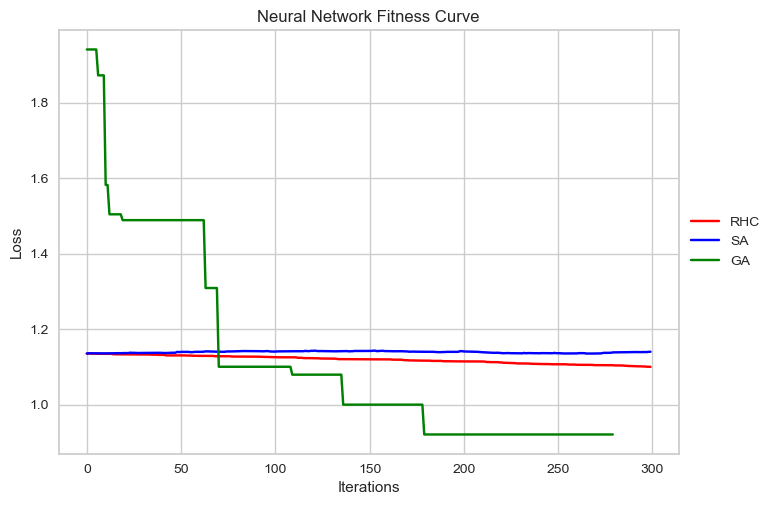

In [116]:
plt.plot(HC_NN.fitness_curve[:,0], label='RHC', color='red')
plt.plot(SA_NN.fitness_curve[:,0], label='SA', color='blue')
plt.plot(GA_NN.fitness_curve[:,0], label='GA', color='green')
#plt.plot(GD_NN.fitness_curve, label='GD', color='orange')
plt.plot
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.title("Neural Network Fitness Curve")

print(HC_NN.fitness_curve.shape)

In [154]:
HC_fevals = HC_NN.fitness_curve[:,1][-1]
SC_fevals = SA_NN.fitness_curve[:,1][-1]
GA_fevals = GA_NN.fitness_curve[:,1][-1]


times = [round(O_time,3),round(HC_time, 3),round(SA_time, 3),round(GA_time, 3)] 

Fevals = [O_fevals, HC_fevals, SC_fevals, GA_fevals,]

algorithms = ['Original','Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm', ]

accruacy = [O_NN_fitness_curve[:,0][-1],HC_NN.fitness_curve[:,0][-1], SA_NN.fitness_curve[:,0][-1], GA_NN.fitness_curve[:,0][-1]]

#combine all 3
df = pd.DataFrame(list(zip(algorithms, times, Fevals,accruacy)), columns =['Algorithm', 'Time', 'Function Evaluations', 'Accuracy'])
df

,Algorithm,Time,Function Evaluations,Accuracy
0,Original,1.389,837.0,0.9870
1,Hill Climbing,3.818,460.0,0.9238
2,Simulated Annealing,4.729,601.0,0.9480
3,Genetic Algorithm,499.896,56491.0,0.9890


: 